# Logistic regression

In [40]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import mannwhitneyu, linregress
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\data_cleaned_v1.csv')
df

,index,text,label
0,0,These girlfriends deserves a special mention f...,0
1,1,LeSean McCoy going through warmups with first ...,0
2,2,Tom Curran has been called up to England's Ash...,0
3,3,"We'll have turkey on the table Thursday but, a...",0
4,4,The 1945 Sinkings of the Cap Arcona and the Th...,0
...,...,...,...
499932,499995,There are a lot of things that I don't like ab...,1
499933,499996,A year after an unprecedented public outcry ag...,1
499934,499997,Battles Between the English and the Scots\n\nT...,1
499935,499998,Kurt Rambis is the new head coach of the Knick...,1


In [3]:
df = df.sample(frac=1, random_state=78735).reset_index(drop=True)
df

,index,text,label
0,46087,University atheist society president forced to...,0
1,477736,What is Ductwork in a Tub and Ductwork in a Sh...,1
2,493454,The last of the summer transfer windows is ove...,1
3,22361,"Eliot Engel, the ranking Democrat on the House...",0
4,436712,"The former CIA spy, who was the author of the ...",1
...,...,...,...
499932,459436,[There was a video here]\n\nThis week we have ...,1
499933,83541,As the war of words between the two managers s...,0
499934,140214,"It is a given fact that cats, being obligate c...",0
499935,330590,In a recent article by Chris Darden of the St....,1


In [4]:
vectorizer = TfidfVectorizer()
Tfidf = vectorizer.fit_transform(df['text'])

In [5]:
Tfidf

<499937x875483 sparse matrix of type '<class 'numpy.float64'>'
	with 106916197 stored elements in Compressed Sparse Row format>

## Define models

In [6]:
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(Tfidf, df['label'])

LogisticRegression(solver='liblinear')

In [7]:
model_SVM = LinearSVC()
model_SVM.fit(Tfidf, df['label'])

LinearSVC()

In [44]:
model_SVM2 = SVC(kernel='linear', probability=True)
model_SVM2.fit(Tfidf, df['label'])

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(Tfidf, df['label'])

## Testing the model

In [91]:
df_test = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\data_test_v1.csv')

In [92]:
df_test = df_test.sample(frac=1, random_state=96202).reset_index(drop=True)

In [93]:
df_test

,text,label
0,A spoof of typical 1980's teen movies. The ide...,0
1,I was a victim of a false rape report by a fel...,1
2,An artist's impression of the planet Kepler 46...,1
3,During a live stream interview conducted by Dr...,0
4,"""You guys have this thing for them,"" Mr. Trump...",1
...,...,...
9995,"RICHMOND, Va. – Police responding to a report ...",1
9996,New Delhi : A day after the Narendra Modi gove...,1
9997,"""'Babysitting' scores points for sustaining a ...",0
9998,"After five years of being unemployed, a 27-yea...",1


In [94]:
Tfidf_test = vectorizer.transform(df_test['text'])

In [17]:
def scores(y, y_pred):
    accu = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print('Accuracy: ', round(accu, 2))
    print('Precision: ', round(prec, 2))
    print('Recall: ', round(rec, 2))
    print("F1 Score: ", round(f1, 2))

In [95]:
predict_LR = model_LR.predict(Tfidf_test)
scores(df_test['label'], predict_LR)

Accuracy:  0.88
Precision:  0.89
Recall:  0.87
F1 Score:  0.88


In [102]:
proba_predict_test_LR = model_LR.predict_proba(Tfidf_test)
df_test['predictions'] = proba_predict_test_LR[:,1]

In [103]:
df_test

,text,label,predictions
0,A spoof of typical 1980's teen movies. The ide...,0,0.122164
1,I was a victim of a false rape report by a fel...,1,0.987690
2,An artist's impression of the planet Kepler 46...,1,0.867020
3,During a live stream interview conducted by Dr...,0,0.092449
4,"""You guys have this thing for them,"" Mr. Trump...",1,0.863912
...,...,...,...
9995,"RICHMOND, Va. – Police responding to a report ...",1,0.916716
9996,New Delhi : A day after the Narendra Modi gove...,1,0.971078
9997,"""'Babysitting' scores points for sustaining a ...",0,0.007029
9998,"After five years of being unemployed, a 27-yea...",1,0.936194


In [104]:
df_test.to_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\test_predicted_LR1.csv', index=False)

In [14]:
predict_SVM = model_SVM.predict(Tfidf_test)
scores(df_test['label'], predict_SVM)

Accuracy:  0.9
Precision:  0.9
Recall:  0.9
F1 Score:  0.9


In [35]:
predict_SVM

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [15]:
model_SVM.score(Tfidf_test, df_test['label'])

0.8992

## Use model on news data

## Financial news

In [13]:
df_finance_news = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\news\finance_processed.csv')

In [14]:
Tfidf_finance = vectorizer.transform(df_finance_news['summary'])
Tfidf_finance

<2607x875483 sparse matrix of type '<class 'numpy.float64'>'
	with 161804 stored elements in Compressed Sparse Row format>

In [15]:
pred_finance = model_LR.predict_proba(Tfidf_finance)

In [16]:
pred_finance = pd.DataFrame(pred_finance)

In [17]:
pred_finance[1].mean().round(4)

0.2338

In [18]:
pred_finance.describe()

,0,1
count,2607.000000,2607.000000
mean,0.766218,0.233782
std,0.202502,0.202502
min,0.015535,0.001608
25%,0.666001,0.080888
50%,0.832699,0.167301
75%,0.919112,0.333999
max,0.998392,0.984465


In [23]:
pred_finance.to_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\finance_predicted_LR1.csv', index=False)

## sports news

In [24]:
df_sport_news = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\news\sport_processed.csv')

In [25]:
Tfidf_sport = vectorizer.transform(df_sport_news['summary'])
Tfidf_sport

<2981x875483 sparse matrix of type '<class 'numpy.float64'>'
	with 189785 stored elements in Compressed Sparse Row format>

In [26]:
pred_sport = model_LR.predict_proba(Tfidf_sport)

In [27]:
pred_sport = pd.DataFrame(pred_sport)
pred_sport[1].mean().round(4)

0.2205

In [28]:
pred_sport.describe()

,0,1
count,2981.000000,2981.000000
mean,0.779479,0.220521
std,0.214081,0.214081
min,0.003649,0.001247
25%,0.688415,0.062890
50%,0.858466,0.141534
75%,0.937110,0.311585
max,0.998753,0.996351


In [29]:
pred_sport.to_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\sport_predicted_LR1.csv', index=False)

## Election news

In [30]:
df_election_news = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\news\election_processed.csv')

In [31]:
Tfidf_election = vectorizer.transform(df_election_news['summary'])
Tfidf_election

<3053x875483 sparse matrix of type '<class 'numpy.float64'>'
	with 193227 stored elements in Compressed Sparse Row format>

In [32]:
pred_election = model_LR.predict_proba(Tfidf_election)

In [33]:
pred_election = pd.DataFrame(pred_election)
pred_election[1].mean().round(4)

0.2412

In [31]:
election_highprob = list(pred_election[1].sort_values(ascending=False).iloc[0:10].index)

In [26]:
highprob_news = df_election_news.loc[election_highprob, 'summary']

In [27]:
highprob_news.iloc[2]

"Labour is not gaining the seats that it would need to form a government at the next general election, a minister has said. Transport minister Richard Holden told the  BBC 's Elections 2023 programme: 'The truth is the seats that we need to win at a general election right across the country, you are just not seeing those Labour gains that they would need to do in order to form a government at the next general election at this stage.' Asked about the latest projections, Mr Holden said people have had a 'tough time' with the cost of living, adding: 'The Government has had to put a huge package in there, but people are still feeling it."

In [34]:
pred_election.describe()

,0,1
count,3053.000000,3053.000000
mean,0.758788,0.241212
std,0.204690,0.204690
min,0.014100,0.001325
25%,0.656406,0.082002
50%,0.819824,0.180176
75%,0.917998,0.343594
max,0.998675,0.985900


In [35]:
pred_election.to_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\election_predicted_LR1.csv', index=False)

## general news

In [19]:
df_general_news = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\news\general_processed.csv')

In [20]:
df_general_news

,index,date,url,author,title,topic,summary,q
0,0,2023-06-01 13:55:00,yahoo.com,Valoe Oyj,Valoe Corporation's Share Subscription Based o...,news,Valoe Corporation Stock Exchang...,"""the"""
1,1,2023-06-02 14:45:00,msn.com,Park Ranger John,Epic Guide to Revolutionary War National Park ...,travel,Epic Guide to Revolutionary War National Park ...,"""the"""
2,2,2023-05-31 21:00:00,msn.com,Kudanisar Shrine,Kudanisar Shrine location and walkthrough in Z...,entertainment,Kudanisar Shrine is located within The Legend ...,"""the"""
3,3,2023-06-04 00:00:00,mdpi.com,Jozef Vlček,Analysis of a Large-Scale Physical Model of Ge...,science,"Department of Geotechnics, Faculty of Civil En...","""the"""
4,4,2023-05-31 00:00:00,mdpi.com,Stefania Fedyay,Medical Support for Space Missions: The Case o...,science,"Institute of Biomedical Problems (IBMP), Russi...","""the"""
...,...,...,...,...,...,...,...,...
7340,9195,2023-05-29 14:34:57,msn.com,Sara Klimek,16 Mistakes You're Making With Homemade Cheese...,news,Although cheesecake technically isn't consider...,"""the"""
7341,9196,2023-05-29 00:06:06,foxnews.com,Bradford Betz,"Biden, McCarthy reach debt ceiling deal to avo...",politics,President Biden and House Speaker Kevin McCar...,"""the"""
7342,9197,2023-06-03 22:30:00,espn.com,Greg Wyshynski,NHL reveals 'unprecedented' twin bill of outdo...,news,The 2024 NHL Stadium Series will be held at Me...,"""the"""
7343,9198,2023-05-29 17:09:07,nypost.com,Emily Crane,Debt ceiling deal: What is it and what does it...,news,Just days before the US could start to run out...,"""the"""


In [21]:
Tfidf_general = vectorizer.transform(df_general_news['summary'])
Tfidf_general

<7345x875483 sparse matrix of type '<class 'numpy.float64'>'
	with 486429 stored elements in Compressed Sparse Row format>

In [22]:
pred_general = model_LR.predict_proba(Tfidf_general)

In [25]:
pred_general = pd.DataFrame(pred_general)

In [26]:
pred_general.describe()

,0,1
count,7345.000000,7345.000000
mean,0.736594,0.263406
std,0.231227,0.231227
min,0.010382,0.000195
25%,0.608326,0.080042
50%,0.816838,0.183162
75%,0.919958,0.391674
max,0.999805,0.989618


In [27]:
pred_general.to_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\general_predicted_LR1.csv', index=False)

## Newer GPT models

In [13]:
df_gpt_3 = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\ChatGPT\gpt_3_processed.csv')
df_gpt_4 = pd.read_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\ChatGPT\gpt_4_processed.csv')

In [16]:
Tfidf_gpt_3 = vectorizer.transform(df_gpt_3['text'])
Tfidf_gpt_4 = vectorizer.transform(df_gpt_4['text'])

In [18]:
proba_predict_gpt_3_LR = model_LR.predict_proba(Tfidf_gpt_3)
df_gpt_3['predictions'] = proba_predict_gpt_3_LR[:,1]
proba_predict_gpt_4_LR = model_LR.predict_proba(Tfidf_gpt_4)
df_gpt_4['predictions'] = proba_predict_gpt_4_LR[:,1]

In [21]:
df_gpt_3.to_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\gpt_3_predicted_LR1.csv', index=False)
df_gpt_4.to_csv(r'C:\Users\Sten\Documents\EUR BAM\Thesis\data\predictions\gpt_4_predicted_LR1.csv', index=False)

## Feature importance

In [22]:
features = np.array(vectorizer.get_feature_names_out())

In [23]:
sorted_coefficients = model_LR.coef_[0].argsort()

In [31]:
print('Positive features:', features[sorted_coefficients[:-21:-1]])
print('Negative features:',features[sorted_coefficients[:20]])

Positive features: ['new' 'also' 'the' 'an' 'few' 'been' 'including' 'able' 'variety' 'has'
 'was' 'addition' 'number' 'domainmarket' 'not' 'make' 'first' 'lot'
 'latest' 'other']
Negative features: ['obviously' 'basically' 'perhaps' 'up' 'besides' 'literally' 'apparently'
 'none' 'essentially' 'unlike' 'unfortunately' 'neither' 'seemingly'
 'clearly' 'almost' 'honestly' 'mostly' 'ultimately' 'nobody' 'once']


In [28]:
postive_features = [features[j] for j in sorted_coefficients[:-201:-1]]
negative_features = [features[j] for j in sorted_coefficients[:200]]
length_postive_featues = [len(j) for j in postive_features]
length_negative_featues = [len(j) for j in negative_features]

In [29]:
statistics.mean(length_postive_featues)

5.91

In [30]:
statistics.mean(length_negative_featues)

7.3

In [70]:
stat, p_value = mannwhitneyu(length_postive_featues, length_negative_featues)
print(f'Statistics={stat}, p={p_value}')

Statistics=13156.5, p=2.4655667688760804e-09


In [49]:
features[sorted_coefficients]

array(['obviously', 'basically', 'perhaps', ..., 'the', 'also', 'new'],
      dtype=object)

In [32]:
coefficients = model_LR.coef_[0]
word_lengths = [len(feature) for feature in features]

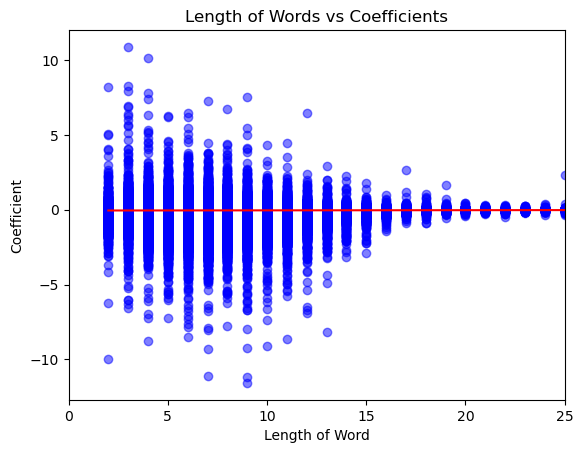

In [41]:
slope, intercept, r_value, p_value, std_err = linregress(word_lengths, coefficients)
plt.scatter(word_lengths, coefficients, c='blue', alpha=0.5)
plt.title('Length of Words vs Coefficients')
plt.xlabel('Length of Word')
plt.ylabel('Coefficient')
plt.xlim(0, 25)
x_values = np.linspace(min(word_lengths), max(word_lengths), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, c='red')

plt.show()

### Combine coeff with count